In [1]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Reading the data 
data = pd.read_csv("./data/winequality-red.csv")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
bias = np.ones(data.shape[0])
data['bias'] = bias
y = np.array(data['quality'])

In [5]:
columns = ['bias']
for i in data.columns[:11]:
    columns.append(i)

In [6]:
columns

['bias',
 'fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [7]:
data[columns]

,bias,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,1.0,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,1.0,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,1.0,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,1.0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,1.0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,1.0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,1.0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [8]:
M = data[columns].to_numpy()

In [9]:
print("Data shape:{}\nTarget shape: {}\n".format(M.shape, y.shape))

Data shape:(1599, 12)
Target shape: (1599,)



In [10]:
# Linear regression using Moore-Penrose Pseudo Inverse
w = np.matmul(np.matmul(np.linalg.inv(np.matmul(M.T, M)),M.T), y)
pred = np.matmul(M,w)

In [11]:
# Mean square error of the predictions
mean_sq_err = np.sum(np.square(y-pred))/data.shape[0]
mean_sq_err

0.41676716722140805

In [12]:
# Mean absolute error
mean_abs_err = np.sum(np.abs(y-pred)) / data.shape[0]
mean_abs_err

0.5004899636748904

In [13]:
# Linear regression using the linear regression package ibn scikit learn
data = pd.read_csv("./data/winequality-red.csv")
x_data = data.drop(['quality'], axis = 1)
lr = LinearRegression()
x = data[x_data.columns[:11]].to_numpy()
y = data['quality'].to_numpy()

In [14]:
lr.fit(x, y)
w = lr.coef_[0]
pred = lr.predict(x)

In [15]:
mean_sq_err = mean_squared_error(y, pred)
mean_sq_err

0.41676716722140794

In [16]:
mean_abs_err = mean_absolute_error(y, pred)
acc = accuracy_score(y, pred)
mean_abs_err

NameError: name 'accuracy_score' is not defined

In [17]:
# We can improve the performance by adding more features, below 5th column is squared and added as another feature
x_data['x2'] = x[:,4]**2
x_data['x3'] = x[:,5]**2
x = x_data.to_numpy()
lr.fit(x, y)
w = lr.coef_[0]
pred = lr.predict(x)

In [18]:
mean_sq_err = mean_squared_error(y, pred)
mean_sq_err

0.415854040093072

In [19]:
mean_abs_err = mean_absolute_error(y, pred)
mean_abs_err

0.49983321460444324

In [20]:
# Function to calculate the cost
def compute_cost(y, x, theta):
    n = y.shape[0]
    cost = np.sum(np.square(np.matmul(x, theta) - y))/(2*n)
    return cost

In [21]:
bias = np.ones(data.shape[0])
data['bias'] = bias
y = np.array(data['quality'])
columns = ['bias']
for i in data.columns[:11]:
    columns.append(i)
M = data[columns].to_numpy()
w = np.zeros((12,))
cost = compute_cost(y, M, w)

In [22]:
cost

16.20825515947467

In [23]:
def gradient_descent(x,y, w, lr, num_iter):
    n = y.shape[0]
    hist = np.zeros((num_iter,))
    for i in range(num_iter):
        w[0] = w[0] - (lr/n)*np.sum(np.matmul(x, w) -y)
        w[1:] = w[1:] - (lr/n)*np.sum(np.matmul(np.matmul(x[:,1:], w[1:]).T, x[:,1:]))        
        hist[i] = compute_cost(y, x, w)
    return w, hist

In [24]:
iterations = 5000
alpha = 0.01
theta, hist = gradient_descent(x = M, y = y, w = w, lr = alpha, num_iter = iterations)

In [25]:
print("Theta: {}\nloss during 1st iteration: {}\nloss after the last iteration:{}".format(theta, hist[0], hist[-1]))

Theta: [5.63602251 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
loss during 1st iteration: 15.892195899172444
loss after the last iteration:0.32588026991541386


Text(0.5, 1.0, 'Loss vs iterations - Gradient Descent, lr = 0.01')

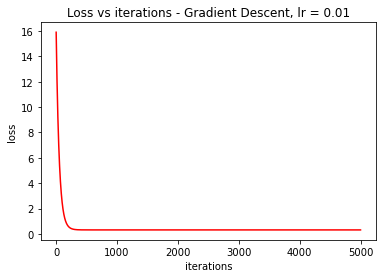

In [26]:
plt.plot(range(iterations), hist, c='red')
plt.xlabel("iterations")
plt.ylabel("loss")
plt.title("Loss vs iterations - Gradient Descent, lr = {}".format(alpha))

In [27]:
bias = np.ones(data.shape[0])
data['bias'] = bias
y = np.array(data['quality'])
columns = ['bias']
for i in data.columns[:11]:
    columns.append(i)
M = data[columns].to_numpy()
w = np.zeros((12,))
cost = compute_cost(y, M, w)
iterations = 5000
alpha = 0.02
theta, hist = gradient_descent(x = M, y = y, w = w, lr = alpha, num_iter = iterations)

Text(0.5, 1.0, 'Loss vs iterations - Gradient Descent, lr = 0.02')

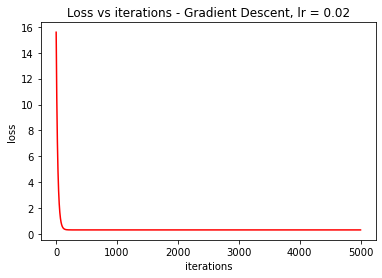

In [28]:
plt.plot(range(iterations), hist, c='red')
plt.xlabel("iterations")
plt.ylabel("loss")
plt.title("Loss vs iterations - Gradient Descent, lr = {}".format(alpha))

Text(0.5, 1.0, 'Loss vs iterations - Gradient Descent, lr = 0.001')

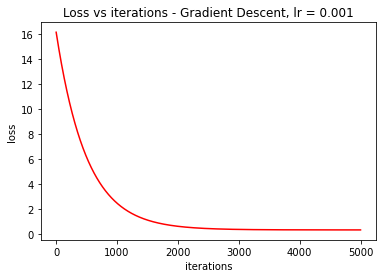

In [29]:
bias = np.ones(data.shape[0])
data['bias'] = bias
y = np.array(data['quality'])
columns = ['bias']
for i in data.columns[:11]:
    columns.append(i)
M = data[columns].to_numpy()
w = np.zeros((12,))
cost = compute_cost(y, M, w)
iterations = 5000
alpha = 0.001
theta, hist = gradient_descent(x = M, y = y, w = w, lr = alpha, num_iter = iterations)
plt.plot(range(iterations), hist, c='red')
plt.xlabel("iterations")
plt.ylabel("loss")
plt.title("Loss vs iterations - Gradient Descent, lr = {}".format(alpha))

Text(0.5, 1.0, 'Loss vs iterations - Gradient Descent, lr = 0.0001')

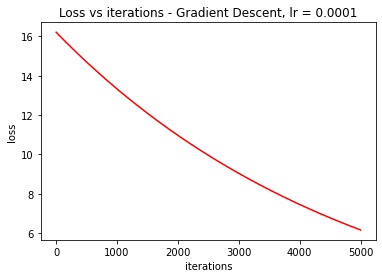

In [30]:
bias = np.ones(data.shape[0])
data['bias'] = bias
y = np.array(data['quality'])
columns = ['bias']
for i in data.columns[:11]:
    columns.append(i)
M = data[columns].to_numpy()
w = np.zeros((12,))
cost = compute_cost(y, M, w)
iterations = 5000
alpha = 0.0001
theta, hist = gradient_descent(x = M, y = y, w = w, lr = alpha, num_iter = iterations)
plt.plot(range(iterations), hist, c='red')
plt.xlabel("iterations")
plt.ylabel("loss")
plt.title("Loss vs iterations - Gradient Descent, lr = {}".format(alpha))

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
bias = np.ones(data.shape[0])
data['bias'] = bias
y = np.array(data['quality'])
columns = ['bias']
for i in data.columns[:11]:
    columns.append(i)
M = data[columns].to_numpy()
w = np.zeros((12,))

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(M, y, test_size = 0.25, random_state=1284)

In [34]:
iterations = 5000
alpha = 0.001
theta, hist = gradient_descent(x = X_train, y = Y_train, w = w, lr = alpha, num_iter = iterations)

In [35]:
compute_cost(Y_train, X_train, theta)

0.30885214795173394

In [36]:
compute_cost(Y_test, X_test, theta)

0.37949587397637286

In [37]:
bias = np.ones(data.shape[0])
data['bias'] = bias
y = np.array(data['quality'])
columns = ['bias']
for i in data.columns[:11]:
    columns.append(i)
M = data[columns].to_numpy()
w = np.zeros((12,))
X_train, X_test, Y_train, Y_test = train_test_split(M, y, test_size = 0.25, random_state=1285)
iterations = 100
alpha = 0.00001
theta1, hist1 = gradient_descent(x = X_train, y = Y_train, w = w, lr = alpha, num_iter = iterations)
compute_cost(Y_test, X_test, theta1)

15.939680928936713

In [38]:
bias = np.ones(data.shape[0])
data['bias'] = bias
y = np.array(data['quality'])
columns = ['bias']
for i in data.columns[:11]:
    columns.append(i)
M = data[columns].to_numpy()
w = np.zeros((12,))
X_train, X_test, Y_train, Y_test = train_test_split(M, y, test_size = 0.25, random_state=1286)
iterations = 1000000
alpha = 1.
theta2, hist2 = gradient_descent(x = X_train, y = Y_train, w = w, lr = alpha, num_iter = iterations)
compute_cost(Y_test, X_test, theta2)

0.33240631875603865

In [39]:
# Implementation of ridge regression
def gradient_descent_reg(x,y, w, lr, num_iter, lam):
    n = y.shape[0]
    hist = np.zeros((num_iter,))
    for i in range(num_iter):
        w[0] = w[0] - (lr/n)*np.sum(np.matmul(x, w) -y)
        w[1:] = w[1:] - ((lr/n)*np.sum(np.matmul(np.matmul(x[:,1:], w[1:]).T, x[:,1:]))+ (lam/2)*np.sum(np.square(w[1:])))   
        hist[i] = compute_cost(y, x, w)
    return w, hist

In [40]:
bias = np.ones(data.shape[0])
data['bias'] = bias
y = np.array(data['quality'])
columns = ['bias']
for i in data.columns[:11]:
    columns.append(i)
M = data[columns].to_numpy()
w = np.zeros((12,))
X_train, X_test, Y_train, Y_test = train_test_split(M, y, test_size = 0.25, random_state=1285)
iterations = 50000
alpha = 0.001
theta_reg, hist_reg = gradient_descent_reg(x = X_train, y = Y_train, w = w, lr = alpha, num_iter = iterations, lam= 0.001)
compute_cost(Y_test, X_test, theta_reg)

0.33490631875601296

In [41]:
# Lasso regularization
def gradient_descent_lasso_reg(x,y, w, lr, num_iter, lam):
    n = y.shape[0]
    hist = np.zeros((num_iter,))
    for i in range(num_iter):
        w[0] = w[0] - (lr/n)*np.sum(np.matmul(x, w) -y)
        w[1:] = w[1:] - ((lr/n)*np.sum(np.matmul(np.matmul(x[:,1:], w[1:]).T, x[:,1:]))+ (lam/2)*np.sum(np.abs(w[1:])))   
        hist[i] = compute_cost(y, x, w)
    return w, hist

In [42]:
bias = np.ones(data.shape[0])
data['bias'] = bias
y = np.array(data['quality'])
columns = ['bias']
for i in data.columns[:11]:
    columns.append(i)
M = data[columns].to_numpy()
w = np.zeros((12,))
X_train, X_test, Y_train, Y_test = train_test_split(M, y, test_size = 0.25, random_state=1285)
iterations = 50000
alpha = 0.001
theta_lasso_reg, hist_lasso_reg = gradient_descent_lasso_reg(x = X_train, y = Y_train, w = w, lr = alpha, num_iter = iterations, lam= 0.001)
compute_cost(Y_test, X_test, theta_lasso_reg)

0.33490631875601296

In [43]:
lam = np.arange(start=0.001, stop=1, step = 0.002)

In [44]:
lam.shape

(500,)

In [45]:
bias = np.ones(data.shape[0])
data['bias'] = bias
y = np.array(data['quality'])
columns = ['bias']
for i in data.columns[:11]:
    columns.append(i)
M = data[columns].to_numpy()
w = np.zeros((12,))
X_train, X_test, Y_train, Y_test = train_test_split(M, y, test_size = 0.25, random_state=1287)
cost = []
iterations = 5000
alpha = 0.001
for l in lam:
    theta_reg, hist_reg = gradient_descent_reg(x = X_train, y = Y_train, w = w, lr = alpha, num_iter = iterations, lam= l)
    cos = compute_cost(Y_test, X_test, theta_reg)
    cost.append(cos)

Text(0.5, 1.0, 'Loss vs lambda - Gradient Descent, lr = 0.001')

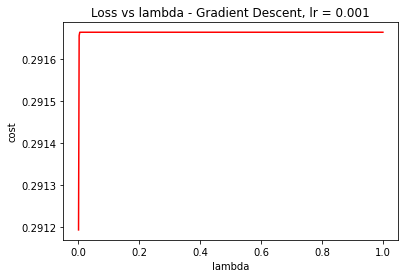

In [46]:
plt.plot(lam, cost, c='red')
plt.xlabel("lambda")
plt.ylabel("cost")
plt.title("Loss vs lambda - Gradient Descent, lr = {}".format(alpha))

Text(0.5, 1.0, 'Loss vs lambda - Gradient Descent, lr = 0.001')

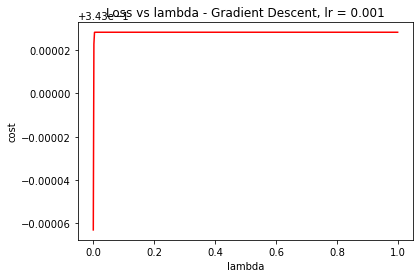

In [47]:
bias = np.ones(data.shape[0])
data['bias'] = bias
y = np.array(data['quality'])
columns = ['bias']
for i in data.columns[:11]:
    columns.append(i)
M = data[columns].to_numpy()
w = np.zeros((12,))
X_train, X_test, Y_train, Y_test = train_test_split(M, y, test_size = 0.25, random_state=1288)
cost = []
iterations = 5000
alpha = 0.001
for l in lam:
    theta_reg, hist_reg = gradient_descent_lasso_reg(x = X_train, y = Y_train, w = w, lr = alpha, num_iter = iterations, lam= l)
    cos = compute_cost(Y_test, X_test, theta_reg)
    cost.append(cos)
plt.plot(lam, cost, c='red')
plt.xlabel("lambda")
plt.ylabel("cost")
plt.title("Loss vs lambda - Gradient Descent, lr = {}".format(alpha))